Model on MNIST Dataset

Minor Project- AI march april batch


In [1]:
# step 1 Gather data

from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
x_train[0].shape

(28, 28)

In [6]:
label = "0 1 2 3 4 5 6 7 8 9"
label = label.split()
label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

9


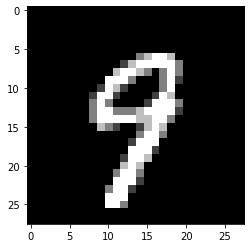

In [7]:
import matplotlib.pyplot as plt
import random

i = random.randint(1,60000)
plt.imshow(x_train[i],cmap='gray')
op = y_train[i]
print(label[op])


In [8]:
# step 2 Normalize

x_train = x_train/255
x_test = x_test/255

In [9]:
# step 3 NN Architecture

from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))                    #fitting model
model.add(layers.Dense(10,activation='softmax'))


In [10]:
# step 4 and 5 compile and fit model

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2858 - accuracy: 0.9147 - val_loss: 0.1104 - val_accuracy: 0.9678
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1430 - accuracy: 0.9562 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1144 - accuracy: 0.9647 - val_loss: 0.0755 - val_accuracy: 0.9787
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0964 - accuracy: 0.9700 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0803 - accuracy: 0.9739 - val_loss: 0.0678 - val_accuracy: 0.9805
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0770 - accuracy: 0.9751 - val_loss: 0.0652 - val_accuracy: 0.9822
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0669 - val_accuracy:

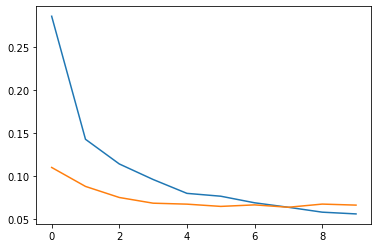

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [12]:
# step 6 evaluation of test data

import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)


array([[ 971,    0,    3,    0,    1,    2,    3,    0,    4,    1],
       [   1, 1122,    1,    0,    0,    0,    2,    0,    0,    2],
       [   0,    3, 1013,    1,    3,    0,    1,    7,    1,    0],
       [   0,    1,    3,  985,    0,    6,    0,    0,    3,    4],
       [   0,    0,    1,    0,  956,    1,    2,    0,    3,    5],
       [   0,    0,    0,    8,    0,  873,    4,    0,    2,    3],
       [   3,    2,    1,    0,    7,    5,  944,    0,    2,    1],
       [   1,    1,    6,    5,    2,    1,    0, 1017,    5,    7],
       [   4,    6,    4,    6,    1,    2,    2,    1,  953,    0],
       [   0,    0,    0,    5,   12,    2,    0,    3,    1,  986]])

In [14]:
accuracy_score(y_pred,y_test)

0.982

In [19]:
model.save("minor_model.csv")


INFO:tensorflow:Assets written to: minor_model.csv/assets


In [16]:
model.to_csv("minor_model.csv",index = False)

AttributeError: ignored